Que. 1

Consider following datasets , do proper EDA (i.e. Scaling, Resampling (if needed), Outlier Handling) on each datasets 
and preapare any three classification models & select best one of them.

Datasets:
wine.csv
framingham.csv
claimants.csv
glass.csv
churn.csv

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [215]:
df=pd.read_csv("C:\Sunbeam Git\Machine Learning\Machine_Learning\datasets\Wine.csv")

In [217]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [221]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [223]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [225]:
from sklearn.preprocessing import StandardScaler
col=df[['Proline']]
sc=StandardScaler()
print(sc.fit(col))


StandardScaler()


In [227]:
df['Proline']=sc.transform(col)

In [229]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1.013009,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.965242,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1.395148,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,2.334574,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,-0.021952,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,0.009893,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,0.280575,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,0.296498,3


In [231]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


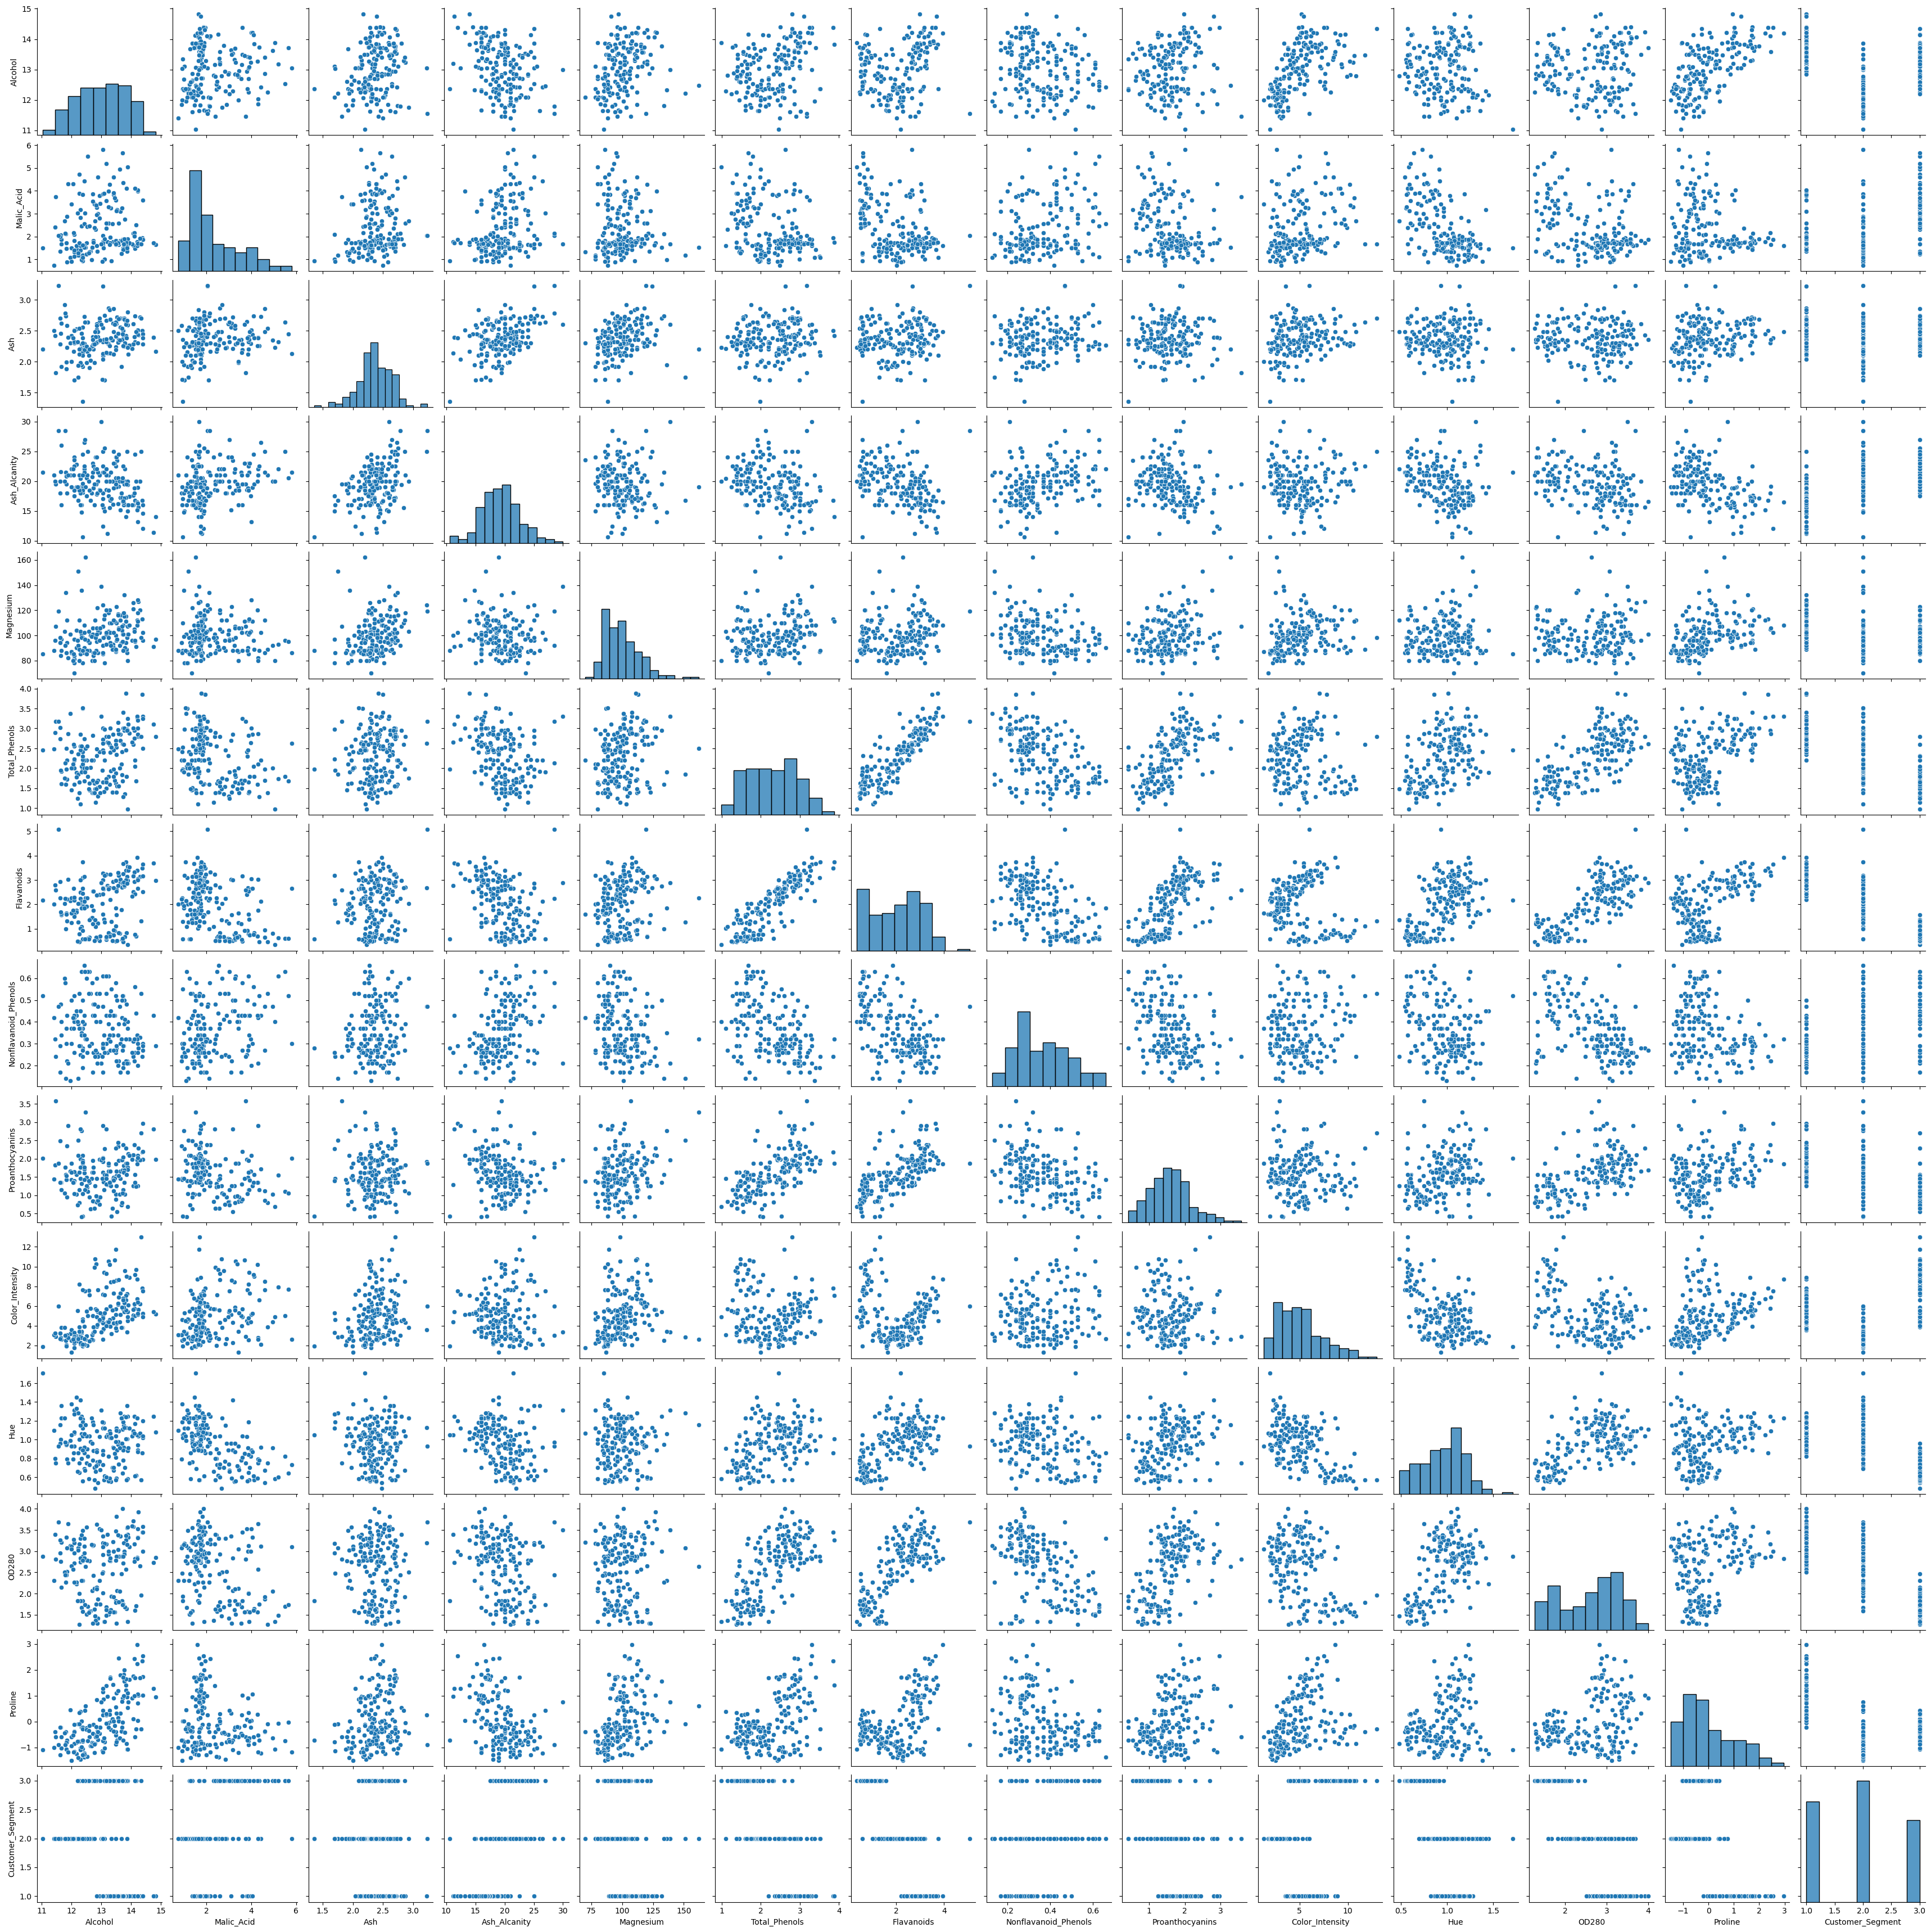

In [233]:
sns.pairplot(df)

In [234]:
X=df.drop('Customer_Segment',axis=1)
y=df['Customer_Segment']

In [402]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [404]:
X_train.shape

(142, 13)

In [406]:
X_test.shape

(36, 13)

In [408]:
from sklearn.linear_model import LogisticRegression

def logistic_model():
    model=LogisticRegression()
    model.fit(X_train,y_train)
    return model

In [410]:
from sklearn.svm import SVC

def svm_model():
    model=SVC()
    model.fit(X_train,y_train)
    return model


In [412]:
from sklearn.naive_bayes import GaussianNB

def nb_model():
    model=GaussianNB()
    model.fit(X_train,y_train)
    return model

In [414]:
models=[]

models.append({"name":"Logistic Regression","model":logistic_model()})
models.append({"name":"SVM","model":svm_model()})
models.append({"name":"Naive Bayes","model":nb_model()})

In [416]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def evaluate_model(model):
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average="macro")
    recall=recall_score(y_test,y_pred,average="macro")
    f1=f1_score(y_test,y_pred,average="macro")

    return f"{accuracy:.2f}",f"{precision:.2f}",f"{recall:.2f}",f"{f1:.2f}"

In [418]:


def evaluate_train_model(model):
    y_pred=model.predict(X_train)
    accuracy=accuracy_score(y_train,y_pred)
    precision=precision_score(y_train,y_pred,average="macro")
    recall=recall_score(y_train,y_pred,average="macro")
    f1=f1_score(y_train,y_pred,average="macro")

    return f"{accuracy:.2f}",f"{precision:.2f}",f"{recall:.2f}",f"{f1:.2f}"

    

for model_info in models:
    accuracy,precision,recall,f1=evaluate_train_model(model_info['model'])
    model_info["evaluation_train_report"]={
        "accuracy":accuracy,
        "precision":precision,
        "recall":recall,
        "f1":f1
    }

# print the final model comparison report

print("-" * 82)
print("-----------------------------------Training Accuracy------------------------------")
print(f"| {'Model Name':^25} | {'Accuracy':^10} | {'Precision':^11} | {'Recall':^10} | {'F1 Score':^10} |")
print("-" * 82)
for model_info in models:
    # get the evaluation report
    report = model_info['evaluation_train_report']
    
    print(f"| {model_info['name']:^25} | {report['accuracy']:^10} | {report['precision']:^11} | {report['recall']:^10} | {report['f1']:^10} |")

print("-" * 82)


----------------------------------------------------------------------------------
-----------------------------------Training Accuracy------------------------------
|        Model Name         |  Accuracy  |  Precision  |   Recall   |  F1 Score  |
----------------------------------------------------------------------------------
|    Logistic Regression    |    0.99    |    0.99     |    0.99    |    0.99    |
|            SVM            |    0.55    |    0.37     |    0.50    |    0.42    |
|        Naive Bayes        |    0.97    |    0.97     |    0.97    |    0.97    |
----------------------------------------------------------------------------------


In [420]:
for model_info in models:
    accuracy,precision,recall,f1=evaluate_model(model_info['model'])
    model_info["evaluation_report"]={
        "accuracy":accuracy,
        "precision":precision,
        "recall":recall,
        "f1":f1
    }
# print the final model comparison report

print("-" * 82)
print("-----------------------------------Testing Accuracy------------------------------")
print(f"| {'Model Name':^25} | {'Accuracy':^10} | {'Precision':^11} | {'Recall':^10} | {'F1 Score':^10} |")
print("-" * 82)
for model_info in models:
    # get the evaluation report
    report = model_info['evaluation_report']
    
    print(f"| {model_info['name']:^25} | {report['accuracy']:^10} | {report['precision']:^11} | {report['recall']:^10} | {report['f1']:^10} |")

print("-" * 82)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    

----------------------------------------------------------------------------------
-----------------------------------Testing Accuracy------------------------------
|        Model Name         |  Accuracy  |  Precision  |   Recall   |  F1 Score  |
----------------------------------------------------------------------------------
|    Logistic Regression    |    0.97    |    0.98     |    0.98    |    0.98    |
|            SVM            |    0.58    |    0.42     |    0.50    |    0.44    |
|        Naive Bayes        |    1.00    |    1.00     |    1.00    |    1.00    |
----------------------------------------------------------------------------------



 - Naive Bayes has 100% testing accuracy

# II. framhingam.csv

In [495]:
df2=pd.read_csv("C:/Sunbeam Git/Machine Learning/Machine_Learning/Assignment/Datasets/framingham.csv")


In [497]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [499]:
df2.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [501]:
df2.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [503]:

df2.drop(['currentSmoker','heartRate','cigsPerDay','education','BMI'],axis=1,inplace=True)


In [505]:
df2.isna().sum()

male                 0
age                  0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
glucose            388
TenYearCHD           0
dtype: int64

In [507]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   BPMeds           4187 non-null   float64
 3   prevalentStroke  4240 non-null   int64  
 4   prevalentHyp     4240 non-null   int64  
 5   diabetes         4240 non-null   int64  
 6   totChol          4190 non-null   float64
 7   sysBP            4240 non-null   float64
 8   diaBP            4240 non-null   float64
 9   glucose          3852 non-null   float64
 10  TenYearCHD       4240 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 364.5 KB


In [517]:

df2['BPMeds'].value_counts()


BPMeds
0.0    4116
1.0     124
Name: count, dtype: int64

In [515]:
df2['BPMeds']= df2['BPMeds'].fillna(df2['BPMeds'].mode()[0])

In [519]:
df2['BPMeds'].value_counts()

BPMeds
0.0    4116
1.0     124
Name: count, dtype: int64

In [447]:
X=df2.drop("TenYearCHD",axis=1)
y=df2['TenYearCHD']